# TP MCMC
AZIZ Rezak SIQ3


Pardon pour l'organisation j'ai pensé qu'on avait plus de temps et j'ai donc été en déplacement pendant toute la semaine

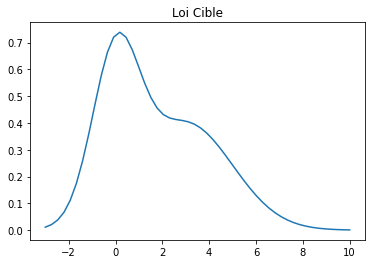

In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt 
from math import *

def density(theta):
    return 0.6*exp(-(theta**2)/2)+0.4*exp(-0.5*(((theta-3)/2)**2))



def density_normal(mu,sigma,x):
    return exp(-(1/2)*(((x-mu)/sigma)**2))/(sigma*sqrt(2*pi))



def Normale(moyenne,ecart_type):
    U=rd.uniform(0,1)
    V=rd.uniform(0,1)
    N=sin(2*pi*V)*sqrt(-2*log(U))
    return ecart_type*N+moyenne

def MA_normal(x,moyenne,ecart_type):
    N=Normale(moyenne,ecart_type)
    return x+N

x=np.linspace(-3,10)
y=[density(i) for i in x] 
y_nor=[density_normal(0,1,i) for i in x] 
plt.title('Loi Cible')
plt.plot(x,y)













# Question 1: 
Tirez un echantillon suivant une marche aleatoire de loi normale 

In [ ]:
def MH_MarcheAlea(X0,nb_iter,moyenne,ecart,nb_echatillon):
    Real=[]
    for i in range(nb_echatillon):
        x=X0
        for i in range(nb_iter):
            yi=MA_normal(x,moyenne,ecart)
            alpha=min(1,(density(yi)/(density(x))))
            u = rd.uniform(0,1)
            if alpha>=u:
                x=yi
            else:
              x=x  
        Real.append(x)
    return Real



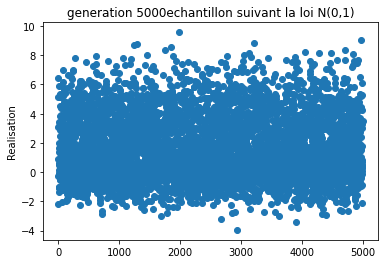

In [ ]:
real=MH_MarcheAlea(1,100,0,1,5000)
real2=MH_MarcheAlea(1,100,0,0.5,5000)
x=[i for i in range(5000)]
plt.title("generation 5000echantillon suivant la loi N(0,1)")
plt.ylabel('Realisation')
plt.scatter(x,real)


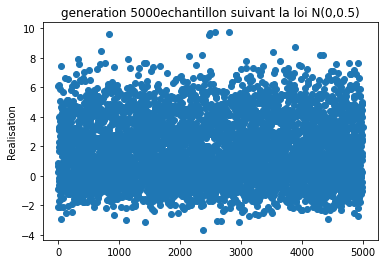

In [ ]:
plt.title("generation 5000echantillon suivant la loi N(0,0.5)")
plt.ylabel('Realisation')
plt.scatter(x,real2)

# Question 2:
On remarque que dans les deux cas les echantillon generé prenne les valeur entre -4 et 11 qui sont les valeur situé sous la curbe de la loi cible

# Question 3:
Dans cette question on affiche les histogramme des echantillon genéré

Text(0.5, 1.0, 'Histogramme loi marche aleatoire de loi N(0,1)')

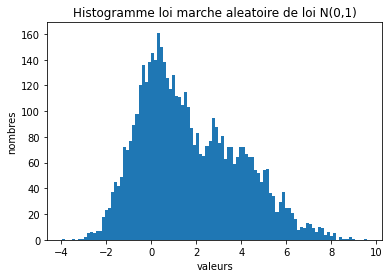

In [ ]:
plt.hist(real,bins=100)
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Histogramme loi marche aleatoire de loi N(0,1)')

Text(0.5, 1.0, 'Histogramme loi marche aleatoire de loi N(0,0.5)')

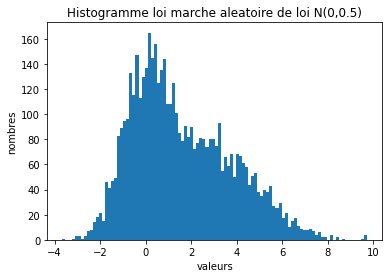

In [ ]:
plt.hist(real2,bins=100)
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Histogramme loi marche aleatoire de loi N(0,0.5)')

# Commentaire:
On remarque bien que ces deux histogramme ressemble bien a la loi a postiriori

# Question 4:
Montrer que la loi normale N(0,3^2) dominera la cible

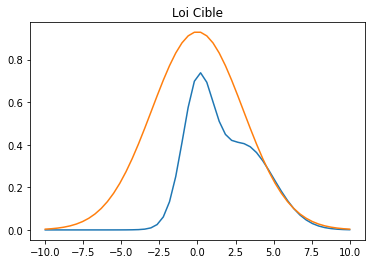

In [ ]:
x=np.linspace(-10,10)
y=[density(i) for i in x] 
y_nor=[7*density_normal(0,3,i) for i in x] 
plt.title('Loi Cible')
plt.plot(x,y)
plt.plot(x,y_nor)

# Question 5:


In [ ]:
def MH_Normale(X0,nb_iter,moyenne,ecart,nb_echatillon):
    Real=[]
    for i in range(nb_echatillon):
        x=X0
        for i in range(nb_iter):
            yi=Normale(moyenne,ecart)
            alpha=min(1,(density(yi)/(density(x))))
            u = rd.uniform(0,1)
            if alpha>=u:
                x=yi
            else:
              x=x  
        Real.append(x)
    return Real

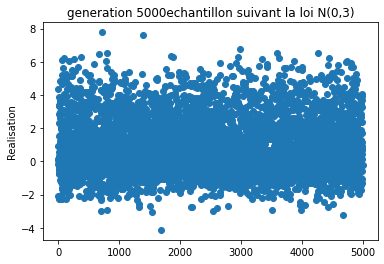

In [ ]:
real=MH_Normale(1,100,0,3,5000)
real2=MH_Normale(1,100,0,2,5000)
x=[i for i in range(5000)]
plt.title("generation 5000echantillon suivant la loi N(0,3)")
plt.ylabel('Realisation')
plt.scatter(x,real)

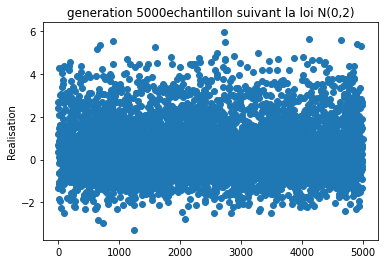

In [ ]:
plt.title("generation 5000echantillon suivant la loi N(0,2)")
plt.ylabel('Realisation')
plt.scatter(x,real2)

#Question 6:
On remarque que la chaine se deplace entre -2 et 8 dans le cas ou on utilise une loi qui domine la loi cible. Cet espace est proche de celui de la densité cible. Cependant dans le cas ou la loi de proposition ne domine pas la density  cible on aura un espace moins restreint et on ne  couvre pas toute la loi cible

#Question 7:


Text(0.5, 1.0, 'Histogramme loi marche aleatoire de loi N(0,3)')

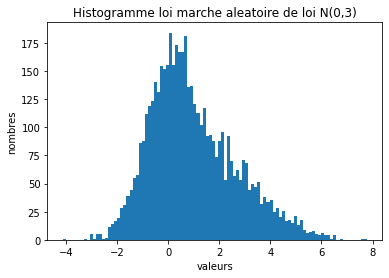

In [ ]:
plt.hist(real,bins=100)
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Histogramme loi marche aleatoire de loi N(0,3)')

Text(0.5, 1.0, 'Histogramme loi marche aleatoire de loi N(0,2)')

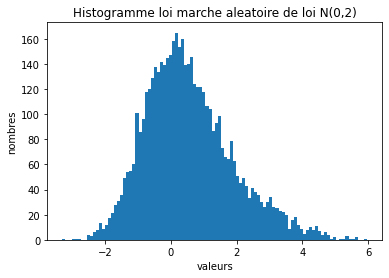

In [ ]:
plt.hist(real2,bins=100)
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Histogramme loi marche aleatoire de loi N(0,2)')

Ces deux histogramme ressemble dans la forme a la loi cible avec un espace moins restreint. Pour la loi N(0,3), on a une forme plus realiste qui couvre la loi cible cela est du au faite que cette derniere domine la loi cible. Dans le cas ou la loi ne domine pas la loi cible (ie la loi normale N(0,2)) On a un espace moins restreint donc ne couvre pas la loi cible dans ce cas on peut dire que les echantillons generé par la loi N(0,2) ne ressemble pas à la loi cible